<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Attrition_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 5: **Employee Attrition**

Algorithm Used: K Nearest Neighbors, Support Vector Machine, Naive Bayes, 
                Decision tree,Random Forest

Steps:

1.  Loading the dataset using pandas library
2.  preprocessing the dataset.
3.  Exploratory Data Analysis
4.  Model building using K Nearest Neighbors, Support Vector Machine, Naive 
    Bayes,Decision tree
5.  Model testing using Classification Report and Confusion Matrix
6.  Applying resampling techniques








In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Data Preprocessing**

In [2]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [3]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','MaritalStatus'],axis=1,inplace=True)

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [7]:
df.shape

(1470, 30)

**Exploratory Data Analysis**

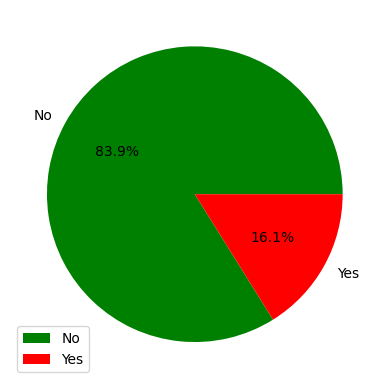

In [9]:
#checking the attrition rate using pie chart
y=df['Attrition'].value_counts()
colors=['green','red']
labels=['No','Yes']
plt.pie(y,labels=labels,colors=colors,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

From this pie chart we can see that the percentage of Attrition rate is comparitively less. **16.1%** is the attrition rate

<ipython-input-10-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

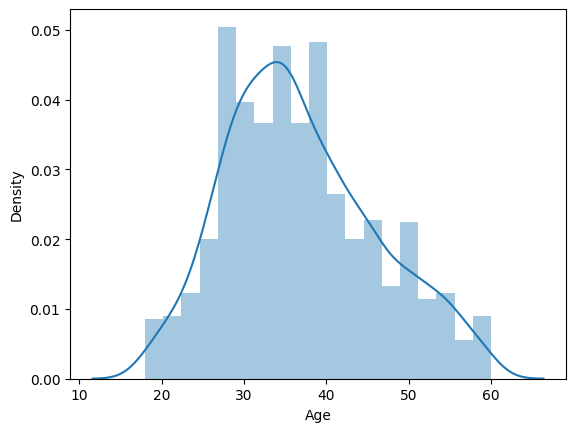

In [10]:
sns.distplot(df['Age'])

From this plot it is visible that most of the workforce lies between the Age group of **30 to 40**

<Axes: xlabel='Department', ylabel='count'>

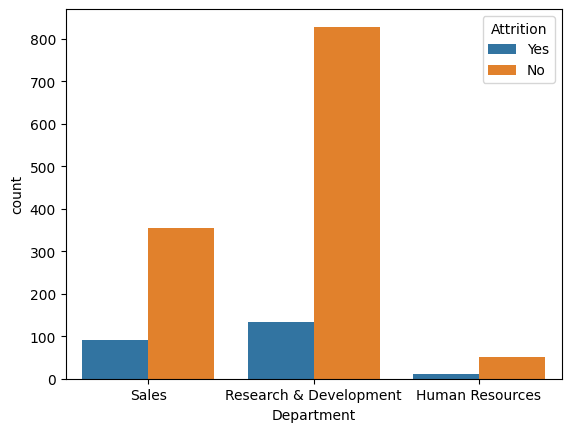

In [16]:
#Checking the Department in which attrition rate is huge
sns.countplot(x='Department',data=df,hue='Attrition')

The Attrition Rate is more in the **Research and Development** Department. whereas the Attrition Rate is very Less in the **HR department**

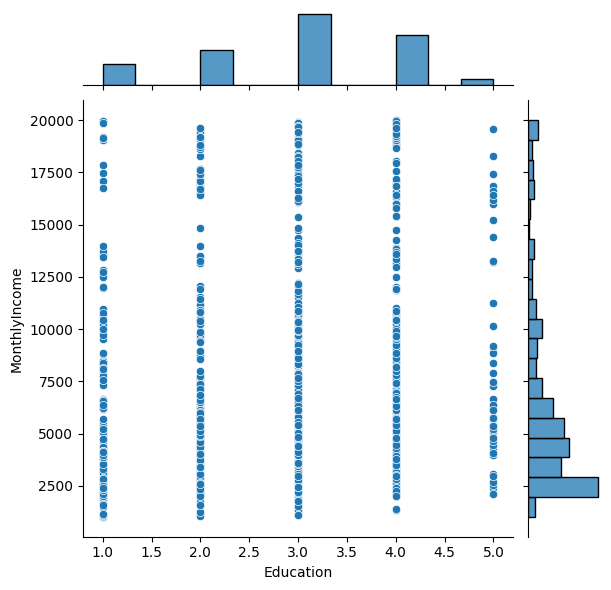

In [15]:
#checking the daily rate according to education
sns.jointplot(x='Education',y='MonthlyIncome',data=df)

From this plot we can see that more number of **graduates** becomes a huge part of the workforce. 

<Axes: xlabel='Age', ylabel='count'>

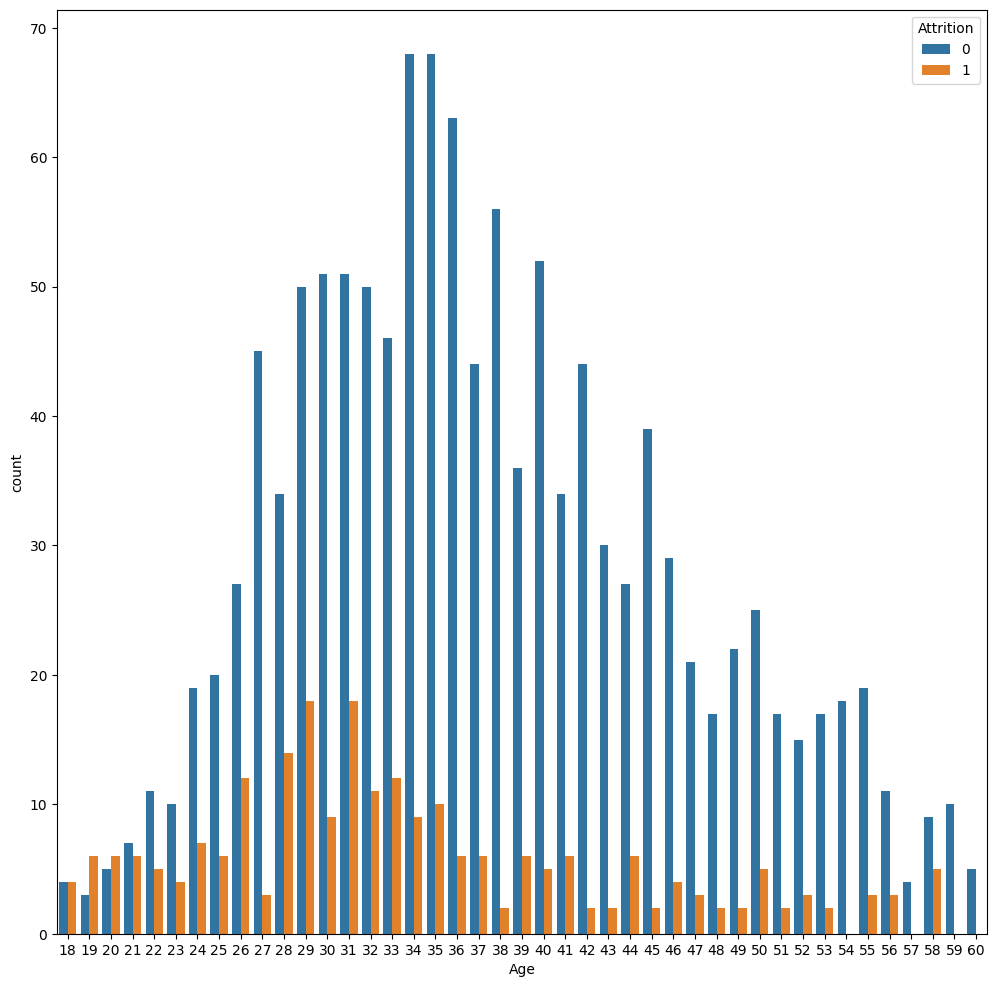

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='Age',data=df,hue='Attrition',ax=ax)

Here we can see that the Attrition rate is more for people in the Age group **29 to 31**. 

<Axes: xlabel='Gender', ylabel='count'>

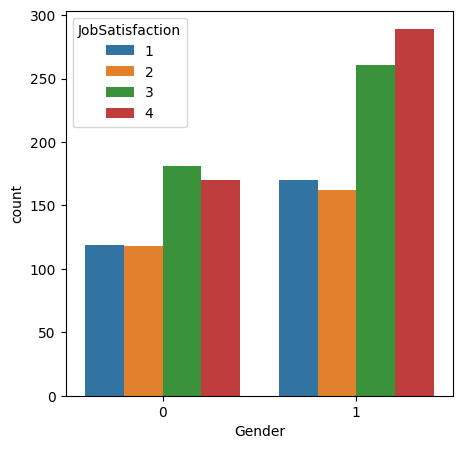

In [26]:
fig,ax=plt.subplots(figsize=(5, 5))
sns.countplot(x='Gender',data=df,hue='JobSatisfaction',ax=ax)

<Axes: xlabel='Gender', ylabel='count'>

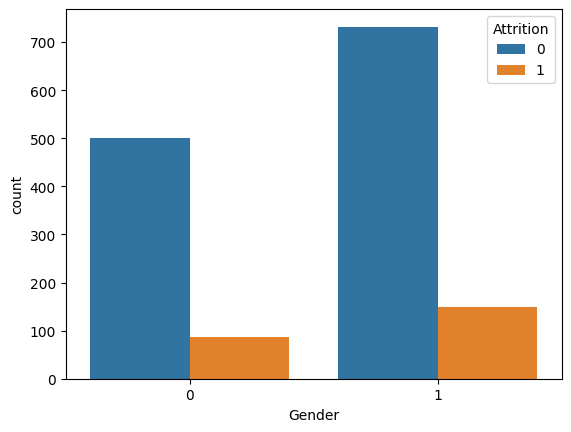

In [ ]:
sns.countplot(x='Gender',data=df,hue='Attrition')

The Attrition rate among **Males** is More than **Females**. 

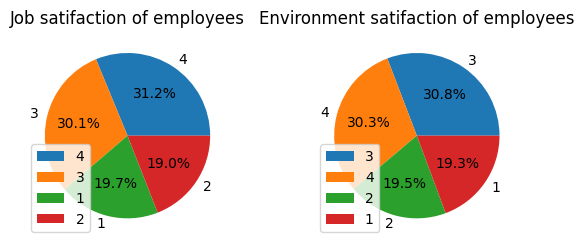

In [23]:
y=df['JobSatisfaction'].value_counts()
labels=['4','3','1','2']
plt.subplot(1,2,1)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Job satifaction of employees')

y=df['EnvironmentSatisfaction'].value_counts()
labels=['3','4','2','1']
plt.subplot(1,2,2)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Environment satifaction of employees')

plt.subplots_adjust(wspace=0.4)
plt.show()


The rating of Job Satisfaction among the employees is **4** only **19.1%** are dissatisfied with their job

Thr rating of work environment satifaction is **3** only **19.3%** are dissatisfied with
the work Environment.

We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

In [32]:
df.sort_values(by='YearsAtCompany',ascending=False).head(10)[['YearsAtCompany','PercentSalaryHike','PerformanceRating']]

,YearsAtCompany,PercentSalaryHike,PerformanceRating
126,40,12,3
98,37,13,3
1116,36,21,4
270,36,14,3
561,34,11,3
237,33,18,3
962,33,11,3
190,33,14,3
914,33,15,3
1111,33,16,3


<ipython-input-44-c86976d7154e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=df,ci=None)


<Axes: xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

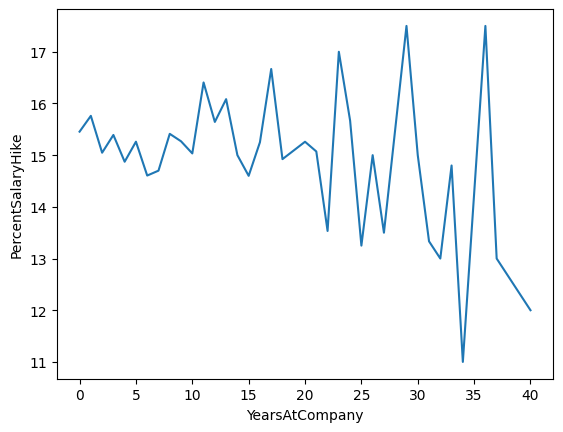

In [44]:
sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=df,ci=None)

From this plot we can see that the percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike

<Axes: xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

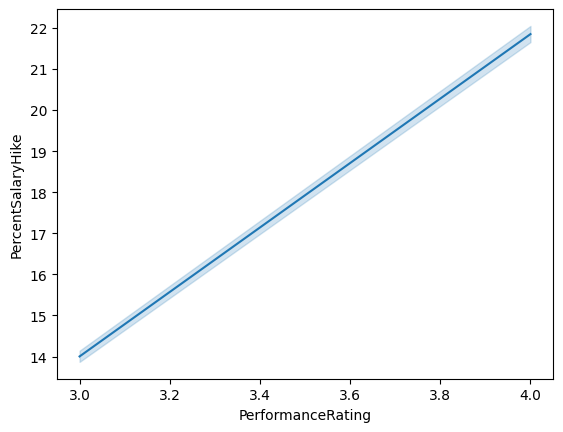

In [35]:
sns.lineplot(x='PerformanceRating',y='PercentSalaryHike',data=df)

Here we can see that the percentage of hike in salary only depends upon Performance of the Employee.

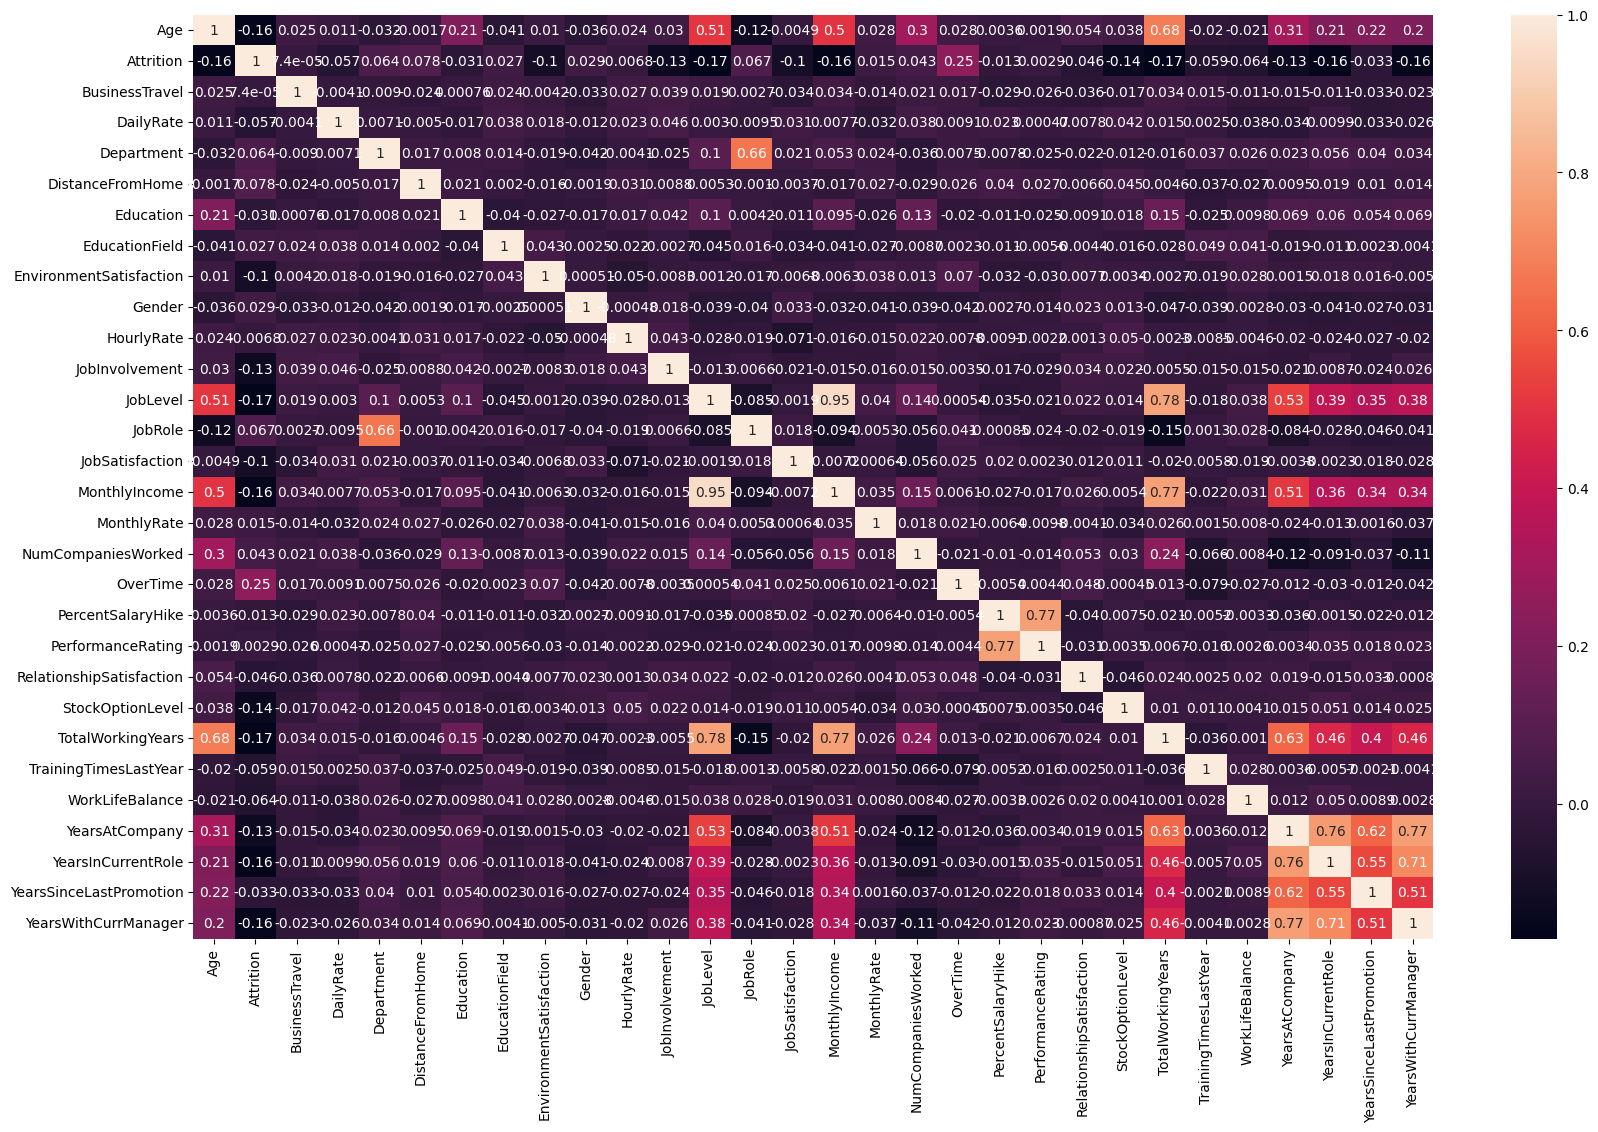

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

**kEY FINDINGS**


* From the pie chart we can see that the percentage of Attrition rate is 
   comparitively less. **16.1%** is the attrition rate 
* It is visible that most of the workforce lies between the Age group of **30 
    to 40**


* The Attrition Rate is more in the **Research and Development** Department.    whereas the Attrition Rate is very Less in the HR department
* we can see that more number of graduates becomes a huge part of the workforce.   


* The Attrition rate is more for people in the Age group **29 to 31**.   
*  The Attrition rate among **Males** is More than **Females**.  

* The rating of Job Satisfaction among the employees is **4** only **19.1% are dissatisfied with their job**

  The rating of work environment satifaction is **3** only **19.3% are dissatisfied with the work Environment**.

  We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

* The percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike.


* the percentage of hike in salary only depends upon Performance of the Employee.











In [17]:
le=LabelEncoder()
lst=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','OverTime']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [18]:
X=df.drop(['Attrition'],axis=1)
y=df.iloc[:,1]

In [19]:
X.dtypes

Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [20]:
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.5,random_state=1)

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       614
           1       0.67      0.12      0.20       121

    accuracy                           0.84       735
   macro avg       0.76      0.55      0.56       735
weighted avg       0.82      0.84      0.80       735

____________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       614
           1       0.50      0.51      0.51       121

    accuracy                           0.84       735
   macro avg       0.70      0.71      0.70       735
weighted avg       0.84      0.84      0.84       735

____________________________________________________________________________________________________
******************** SVC

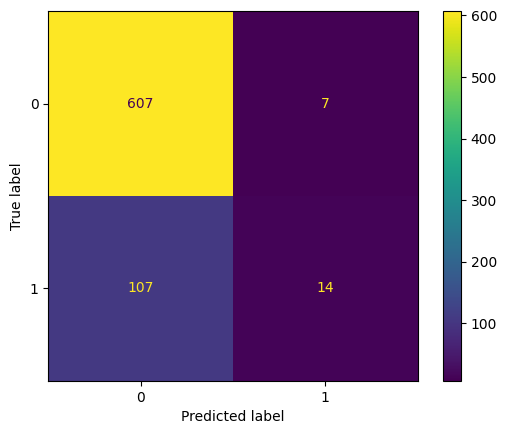

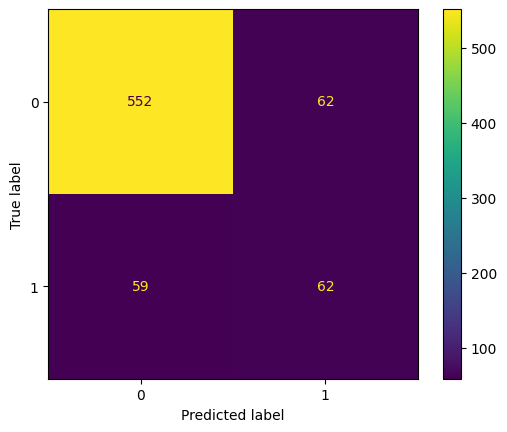

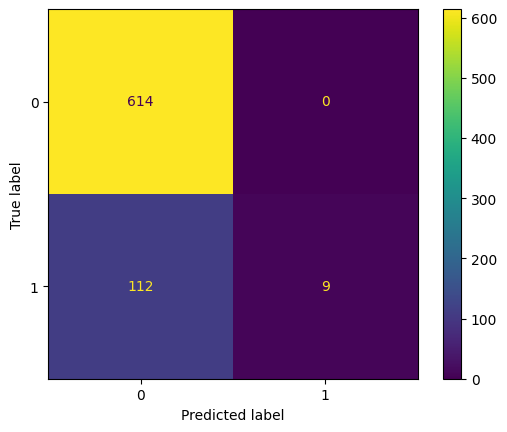

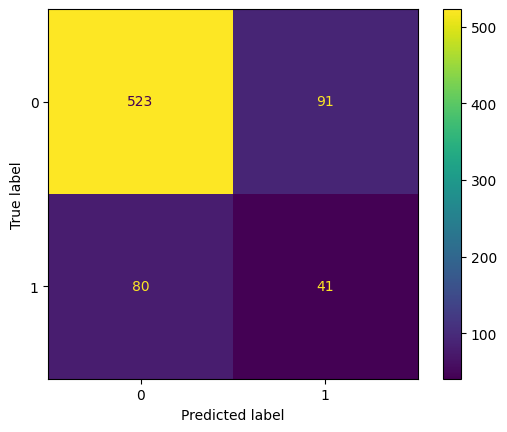

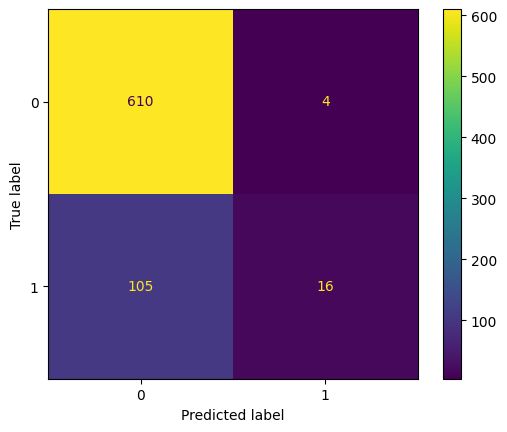

In [22]:
from pandas._libs.tslibs.offsets import MonthEnd
Knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
rs=RandomForestClassifier(n_estimators=50)
models=[Knn,nb,sv,dt,rs]

for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*100)

Applying oversampling technique

In [23]:
from imblearn.over_sampling import ADASYN
sm=ADASYN()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [24]:
y_train_sm.value_counts()

0    619
1    618
Name: Attrition, dtype: int64

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.87      0.61      0.72       614
           1       0.22      0.55      0.32       121

    accuracy                           0.60       735
   macro avg       0.55      0.58      0.52       735
weighted avg       0.77      0.60      0.65       735

____________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       614
           1       0.25      0.69      0.37       121

    accuracy                           0.61       735
   macro avg       0.58      0.65      0.55       735
weighted avg       0.80      0.61      0.66       735

____________________________________________________________________________________________________
******************** SVC

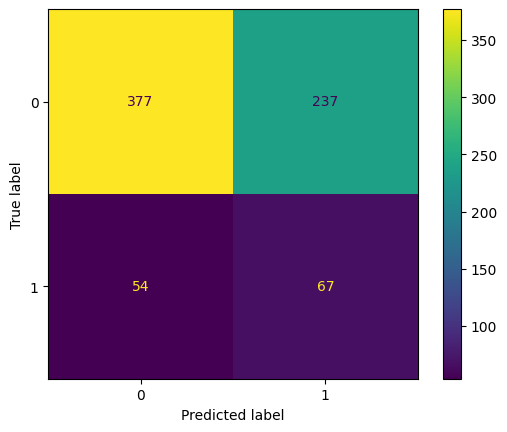

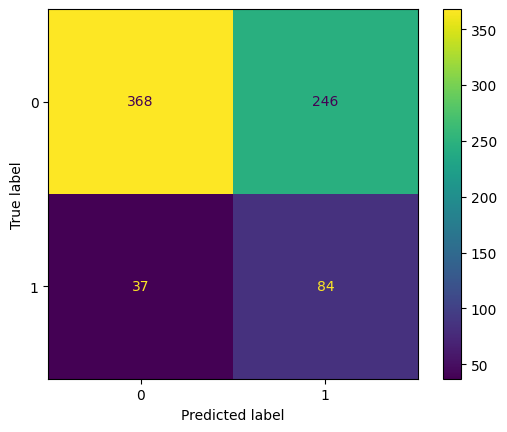

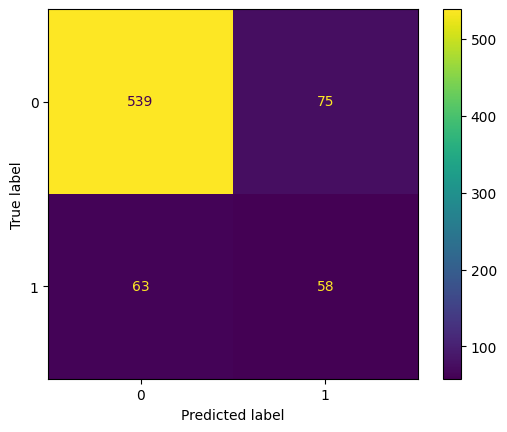

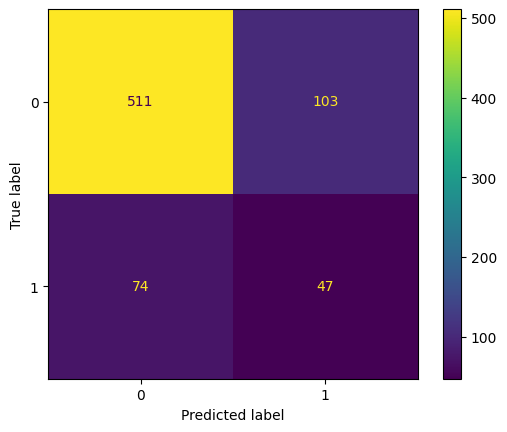

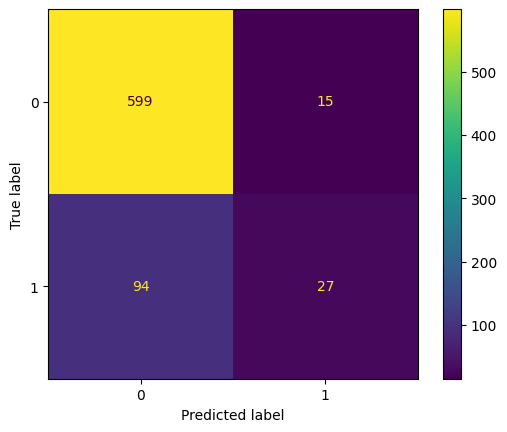

In [27]:
Knn_sm=KNeighborsClassifier()
nb_sm=GaussianNB()
sv_sm=SVC()
dt_sm=DecisionTreeClassifier()
rs_sm=RandomForestClassifier(n_estimators=50)
models=[Knn_sm,nb_sm,sv_sm,dt_sm,rs_sm]

for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train_sm,y_train_sm)
  y_pred1=model.predict(X_test)
  print(classification_report(y_test,y_pred1))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))
  print("_"*100)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [ ]:
y_train_us.value_counts()

0    116
1    116
Name: Attrition, dtype: int64

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       614
           1       0.29      0.62      0.39       121

    accuracy                           0.68       735
   macro avg       0.59      0.66      0.59       735
weighted avg       0.80      0.68      0.72       735

____________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.94      0.69      0.79       614
           1       0.33      0.76      0.46       121

    accuracy                           0.70       735
   macro avg       0.63      0.73      0.63       735
weighted avg       0.84      0.70      0.74       735

____________________________________________________________________________________________________
******************** SVC

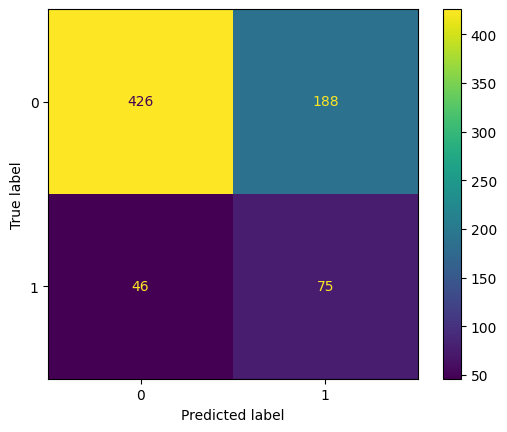

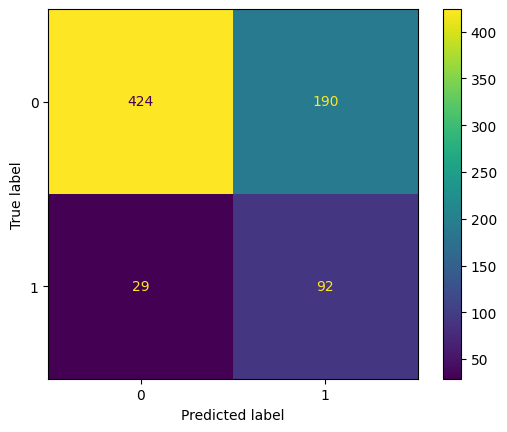

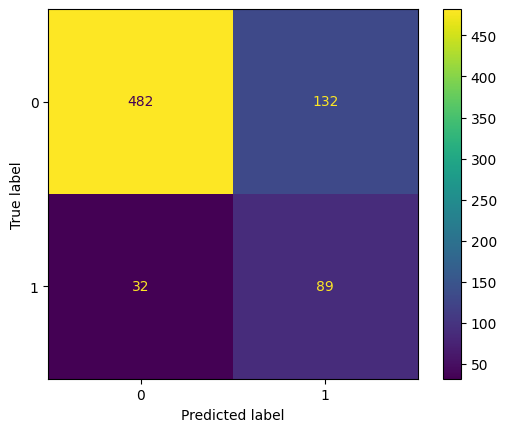

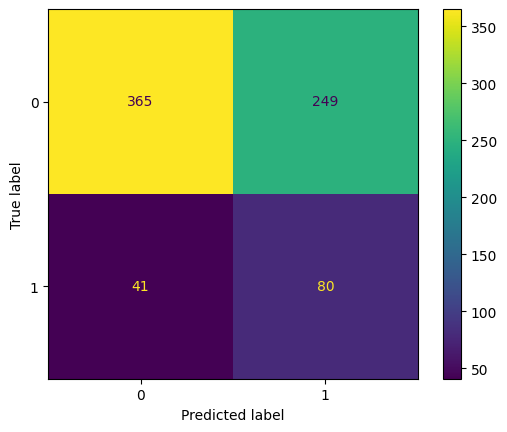

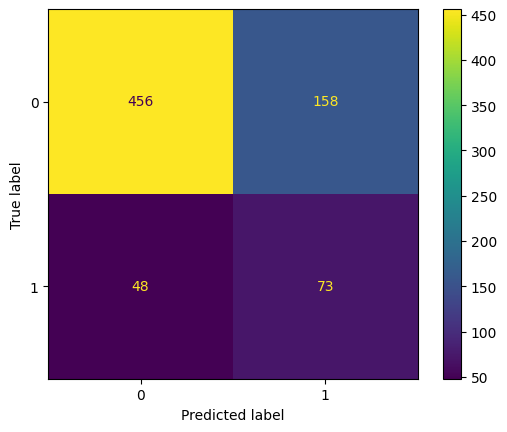

In [ ]:
Knn_us=KNeighborsClassifier()
nb_us=GaussianNB()
sv_us=SVC()
dt_us=DecisionTreeClassifier(criterion='entropy')
rs_us=RandomForestClassifier(n_estimators=50)
models=[Knn_us,nb_us,sv_us,dt_us,rs_us]

for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train_us,y_train_us)
  y_pred2=model.predict(X_test)
  print(classification_report(y_test,y_pred2))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))
  print("_"*100)

When oversampled using **ADASYN** kNN and Random Forest shows an increase in precision,Recall and F1 Score. But KNN shows a decrease in accuracy from 84 to 64 and Random forest shows an increase in accuracy rate from 85 to 86